## Defining Hamiltonians in MPSKit

In [1]:
using MPSKit, MPSKitModels, TensorKit
using ProgressMeter, Plots

## Spin operators
In MPSKit, the operators are defined as TensorMaps. The typical examples are spin operators, but there are other operators such as fermionic operators. Further information can be found [here](https://github.com/maartenvd/MPSKitModels.jl/tree/master/test).

In [2]:
# We specify the spins in the “spin” argument.
spin = 1//2
println(S_x(spin=spin))
println(S_y(spin=spin))
println(S_z(spin=spin))
println(S_plus(spin=spin))
println(S_min(spin=spin))

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  0.5 + 0.0im
 0.5 + 0.0im  0.0 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  0.0 - 0.5im
 0.0 + 0.5im  0.0 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.5 + 0.0im   0.0 + 0.0im
 0.0 + 0.0im  -0.5 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  1.0 + 0.0im
 0.0 + 0.0im  0.0 + 0.0im

TensorMap(ℂ^2 ← ℂ^2):
 0.0 + 0.0im  0.0 + 0.0im
 1.0 + 0.0im  0.0 + 0.0im



In [3]:
# type \bbC  for \mathbb styled C
my_σᶻ= TensorMap([1.0+0.0im 0.0;0.0 -1.0],ℂ^2 ← ℂ^2)
my_σᶻ≈ σᶻ(spin=1//2)

true

Two site operator are also defined in the same way.

In [4]:
spin = 1//2
println(S_xx(spin=spin))
println(S_yy(spin=spin))
println(S_zz(spin=spin))
println(S_plusmin(spin=spin))
println(S_minplus(spin=spin))

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2)):
[:, :, 1, 1] =
 0.0 + 0.0im   0.0 + 0.0im
 0.0 + 0.0im  0.25 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.25 + 0.0im
 0.0 + 0.0im   0.0 + 0.0im

[:, :, 1, 2] =
  0.0 + 0.0im  0.0 + 0.0im
 0.25 + 0.0im  0.0 + 0.0im

[:, :, 2, 2] =
 0.25 + 0.0im  0.0 + 0.0im
  0.0 + 0.0im  0.0 + 0.0im

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2)):
[:, :, 1, 1] =
 0.0 + 0.0im    0.0 + 0.0im
 0.0 + 0.0im  -0.25 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.25 + 0.0im
 0.0 + 0.0im   0.0 + 0.0im

[:, :, 1, 2] =
  0.0 + 0.0im  0.0 + 0.0im
 0.25 + 0.0im  0.0 + 0.0im

[:, :, 2, 2] =
 -0.25 - 0.0im  0.0 + 0.0im
   0.0 + 0.0im  0.0 + 0.0im

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2)):
[:, :, 1, 1] =
 0.25 + 0.0im  0.0 + 0.0im
  0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
   0.0 + 0.0im   0.0 + 0.0im
 -0.25 + 0.0im  -0.0 + 0.0im

[:, :, 1, 2] =
 0.0 + 0.0im  -0.25 + 0.0im
 0.0 + 0.0im   -0.0 + 0.0im

[:, :, 2, 2] =
  0.0 + 0.0im  -0.0 + 0.0im
 -0.0 + 0.0im  0.25 - 0.0im

TensorMap((ℂ^2 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^2

Equivalently, we can define the two site operators using tensor product.

In [5]:
Z = S_z(spin = spin)
ZZ = Z ⊗ Z
ZZZ = Z ⊗ Z ⊗ Z

# \approx check if the two TensorMaps are close.
println(S_zz(spin=spin) ≈ ZZ)

true


In Julia, LaTeX format is supported. For example, $\sigma$ can be typed using “\sigma” and the tab key.

The above tensor product $\otimes$ corresponds to “\otimes”.

Lower and upper cases are a little tricky: You type “\sigma” + tab + “\\^z” + tab to obtain $\sigma^z$. ("\\_z" for lower case)

In [6]:
# Equivalent to 4*S_zz, yet written in the LaTeX format.
σᶻᶻ(spin=spin) ≈ 4*S_zz(spin=spin)

true

Ridiculous example might be the following. You might want to try some.

In [7]:
HₑₗₗₒWₒᵣₗᵈ = "Hello World"
print(HₑₗₗₒWₒᵣₗᵈ)

Hello World

# Constructing Hamiltonian(FiniteChain)

Using spin operators, we can define Hamiltonian. Here, let us consider the transverse-field Ising model as an example!

In [8]:
# Definition of local terms. 
# Heisenberg term is XXZ_term = S_xx(spin=spin)+S_yy(spin=spin)+Δ*S_zz(spin=spin)
J = 1.0 
g = 1.0
ZZ_term = -J*4*S_zz(spin=spin)
X_term = -J*g*2*S_x(spin=spin)

TensorMap(ℂ^2 ← ℂ^2):
 -0.0 - 0.0im  -1.0 - 0.0im
 -1.0 - 0.0im  -0.0 - 0.0im


To construct the Hamiltonian, 

In [9]:
L = 100
χ = 20
lattice = FiniteChain(L)
H_TF = @mpoham sum(nearest_neighbours(lattice)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice)) do i
            # println(i)
            return X_term{i}
    end;

### For more general purposes, we can rewrite as following

In [10]:
L = 100
χ = 20
lattice = FiniteChain(L)
H_TF = @mpoham sum(1:(L-1)) do i
            return ZZ_term{lattice[i],lattice[i+1]}
        end + sum(1:L) do i
            return X_term{lattice[i]}
        end 
# Add + sum(1:(L-2)) do i return ZZZ{lattice[i],lattice[i+1],lattice[i+2] end 
# if you like to add terms with more sites.

MPOHamiltonian{ComplexSpace, TrivialTensorMap{ComplexSpace, 2, 2, Matrix{ComplexF64}}, ComplexF64}(MPSKit.SparseMPOSlice{ComplexSpace, TrivialTensorMap{ComplexSpace, 2, 2, Matrix{ComplexF64}}, ComplexF64}[[TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 1.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  1.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 -1.4142135623730945 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  1.414213562373095 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 -0.0 + 0.0im  -1.0 + 0.0im

[:, :, 2, 1] =
 -1.0 + 0.0im  0.0 + 0.0im
; TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
 TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^2 ⊗ ℂ^1)):
[:, :, 1, 1] =
 0.0 + 0.0im  0.0 + 0.0im

[:, :, 2, 1] =
 0.0 + 0.0im  0.0 + 0.0im
; TensorMap((ℂ^1 ⊗ ℂ^2) ← (ℂ^

In [11]:
# 20 is bond dimension and C^2 is a physical space of spin-1/2
# If use C^(2*S+1) for spin-S systems.
state = FiniteMPS(rand,ComplexF64,L,ℂ^2,ℂ^χ)

100-site FiniteMPS:
┌ CL[101]: TensorMap(ℂ^1 ← ℂ^1)
├── AL[100]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^1)
├── AL[99]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^2)
├── AL[98]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^4)
├── AL[97]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^8)
├── AL[96]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^16)
├── AL[95]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[94]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[93]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[92]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[91]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[90]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
│⋮
├── AL[10]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[9]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[8]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[7]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[6]: TensorMap((ℂ^20 ⊗ ℂ^2) ← ℂ^20)
├── AL[5]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^20)
├── AL[4]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^16)
├── AL[3]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^8)
├── AL[2]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^4)
└── AL[1]: TensorMap((ℂ^1 ⊗ ℂ^2) ← ℂ^2)


In [12]:
ψ₀, cache, delta = find_groundstate(state, H_TF, DMRG());

┌ Info: DMRG iteration:
│   iter = 1
│   ϵ = 0.0002848124935448364
│   λ = -126.96187564667034 - 4.518812337980153e-15im
└   Δt = 8.656252337
┌ Info: DMRG iteration:
│   iter = 2
│   ϵ = 8.973230520385967e-7
│   λ = -126.96187670816168 - 6.4993438111621764e-15im
└   Δt = 7.069218453
┌ Info: DMRG iteration:
│   iter = 3
│   ϵ = 2.418417889721442e-7
│   λ = -126.96187671440825 - 5.0400233666044957e-14im
└   Δt = 5.126073302
┌ Info: DMRG iteration:
│   iter = 4
│   ϵ = 2.746497455591712e-7
│   λ = -126.96187671987266 + 2.096613442216353e-15im
└   Δt = 4.497377085
┌ Info: DMRG iteration:
│   iter = 5
│   ϵ = 2.955420961729154e-7
│   λ = -126.96187672186622 + 3.417648839197513e-14im
└   Δt = 3.605069612
┌ Info: DMRG iteration:
│   iter = 6
│   ϵ = 1.9233153288824947e-7
│   λ = -126.96187672209561 + 2.879750315608974e-14im
└   Δt = 2.610128471
┌ Info: DMRG iteration:
│   iter = 7
│   ϵ = 3.9453069121202264e-8
│   λ = -126.96187672210435 + 1.0621633301557512e-14im
└   Δt = 1.626868814
┌ Info:

┌ Info: DMRG iteration:
│   iter = 33
│   ϵ = 2.1250087030716043e-11
│   λ = -126.96187672210525 - 2.7767649221027663e-14im
└   Δt = 0.159785392
┌ Info: DMRG iteration:
│   iter = 34
│   ϵ = 1.5932655300759405e-11
│   λ = -126.96187672210483 - 4.9104381976408036e-14im
└   Δt = 0.164217365
┌ Info: DMRG iteration:
│   iter = 35
│   ϵ = 1.1947329834699704e-11
│   λ = -126.96187672210533 + 9.527309379153099e-14im
└   Δt = 0.163257477
┌ Info: DMRG iteration:
│   iter = 36
│   ϵ = 8.959511065021527e-12
│   λ = -126.96187672210505 - 4.659158147038142e-14im
└   Δt = 0.158327719
┌ Info: DMRG iteration:
│   iter = 37
│   ϵ = 6.719256172342956e-12
│   λ = -126.96187672210496 + 2.788743425484848e-14im
└   Δt = 0.162445875
┌ Info: DMRG iteration:
│   iter = 38
│   ϵ = 5.039600268671136e-12
│   λ = -126.96187672210489 - 1.0021369609791893e-13im
└   Δt = 0.161827568
┌ Info: DMRG iteration:
│   iter = 39
│   ϵ = 3.778791615411926e-12
│   λ = -126.96187672210483 - 2.4254225737240275e-14im
└   Δt = 0.15

In [13]:
E₀ = sum(real(expectation_value(ψ₀,H_TF)))/(L)

-1.2696187672210528

In [14]:
-4/pi

-1.2732395447351628

# Constructing Hamiltonian(InfiniteChain)

In [15]:
lattice∞ = InfiniteChain(1)
χ = 20
H_TF∞ = @mpoham sum(nearest_neighbours(lattice∞)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice∞)) do i
            return X_term{i}
    end;

#### Equivalently, we can rewrite this as followings:

In [16]:
H_TF∞ = @mpoham sum(1:1) do i
            return ZZ_term{lattice∞[i],lattice∞[i+1]}
         end + sum(1:1) do i
            return X_term{lattice∞[i]}
    end;

In [17]:
random_data = TensorMap(rand, ComplexF64, ℂ^χ * ℂ^2, ℂ^χ);
state∞ = InfiniteMPS([random_data]);

In [18]:
# VUMPS can be seen as an upgrade of iDMRG
ψ₀∞, cache, delta = find_groundstate(state∞, H_TF∞, VUMPS());

┌ Info: VUMPS iteration:
│   iter = 1
│   ϵ = 0.018526693631802982
│   λ = -1.2717627144590407 + 1.0988389018140587e-16im
└   Δt = 0.102486143
┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.002585710102482997
│   λ = -1.2731508605115687 + 4.7704895589362195e-17im
└   Δt = 0.021766801
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.000592300311320643
│   λ = -1.2732304812607325 + 9.584347204771859e-17im
└   Δt = 0.052316253
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.00024570534122514306
│   λ = -1.273235553927618 + 4.163336342344337e-17im
└   Δt = 0.027178757
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.0001680676589985427
│   λ = -1.2732371499580297 + 6.678685382510707e-17im
└   Δt = 0.050974224
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 0.00012923954767281786
│   λ = -1.2732380891697326 + 1.0711917464156784e-16im
└   Δt = 0.046774442
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 0.00011287097321060987
│   λ = -1.2732386158844216 - 1.5233040523421337e-16im
└   Δt = 0.047659

┌ Info: VUMPS iteration:
│   iter = 33
│   ϵ = 1.2298552278005302e-6
│   λ = -1.273239473220122 + 1.3010426069826053e-17im
└   Δt = 0.088927773
┌ Info: VUMPS iteration:
│   iter = 34
│   ϵ = 1.0153785086652925e-6
│   λ = -1.273239473229196 - 8.760353553682876e-17im
└   Δt = 0.083950541
┌ Info: VUMPS iteration:
│   iter = 35
│   ϵ = 8.376749422880824e-7
│   λ = -1.2732394732353294 - 1.8214596497756474e-16im
└   Δt = 0.089763834
┌ Info: VUMPS iteration:
│   iter = 36
│   ϵ = 6.90763376963569e-7
│   λ = -1.2732394732394796 - 1.9949319973733282e-17im
└   Δt = 0.09276011
┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 5.693257089063472e-7
│   λ = -1.2732394732422851 + 1.1535911115245767e-16im
└   Δt = 0.086201288
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 4.6910826556326294e-7
│   λ = -1.2732394732441799 - 1.5612511283791264e-17im
└   Δt = 0.090474368
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 3.8640317976332344e-7
│   λ = -1.2732394732454586 + 1.8214596497756474e-17im
└   Δt = 0.084

┌ Info: VUMPS iteration:
│   iter = 66
│   ϵ = 2.1340021057855813e-9
│   λ = -1.2732394732481263 + 5.2909066017292616e-17im
└   Δt = 0.079200605
┌ Info: VUMPS iteration:
│   iter = 67
│   ϵ = 1.7689144014286067e-9
│   λ = -1.273239473248123 - 1.717376241217039e-16im
└   Δt = 0.084251763
┌ Info: VUMPS iteration:
│   iter = 68
│   ϵ = 1.4671722846146967e-9
│   λ = -1.2732394732481251 + 1.0408340855860843e-16im
└   Δt = 0.076806779
┌ Info: VUMPS iteration:
│   iter = 69
│   ϵ = 1.2176440072549416e-9
│   λ = -1.2732394732481227 + 4.0766001685454967e-17im
└   Δt = 0.083841095
┌ Info: VUMPS iteration:
│   iter = 70
│   ϵ = 1.0112151112774147e-9
│   λ = -1.273239473248124 - 2.6020852139652106e-17im
└   Δt = 0.07816187
┌ Info: VUMPS iteration:
│   iter = 71
│   ϵ = 8.403447551946865e-10
│   λ = -1.273239473248125 + 5.117434254131581e-17im
└   Δt = 0.083170341
┌ Info: VUMPS iteration:
│   iter = 72
│   ϵ = 6.988392840369837e-10
│   λ = -1.2732394732481245 - 4.9439619065339e-17im
└   Δt = 0.0781

┌ Info: VUMPS iteration:
│   iter = 99
│   ϵ = 6.472768214764849e-12
│   λ = -1.2732394732481245 - 3.469446951953614e-18im
└   Δt = 0.070065845
┌ Info: VUMPS iteration:
│   iter = 100
│   ϵ = 5.496189693868729e-12
│   λ = -1.2732394732481236 + 5.984795992119984e-17im
└   Δt = 0.064450002
┌ Warning: VUMPS maximum iterations
│   iter = 100
│   ϵ = 5.496189693868729e-12
│   λ = -1.2732394732481236 + 5.984795992119984e-17im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/vumps.jl:94
┌ Info: VUMPS summary:
│   ϵ = 5.496189693868729e-12
│   λ = -1.2732394732481236 + 5.984795992119984e-17im
└   Δt = 8.697273036


In [19]:
E₀ = real(expectation_value(ψ₀∞,H_TF∞))[0]
println("Exact ground state energy : ",-4/pi)
println("Numerical results : ", E₀)
println("Numerical errors : ", E₀+4/pi)

Exact ground state energy : -1.2732395447351628
Numerical results : -1.2732394732481243
Numerical errors : 7.14870385110089e-8


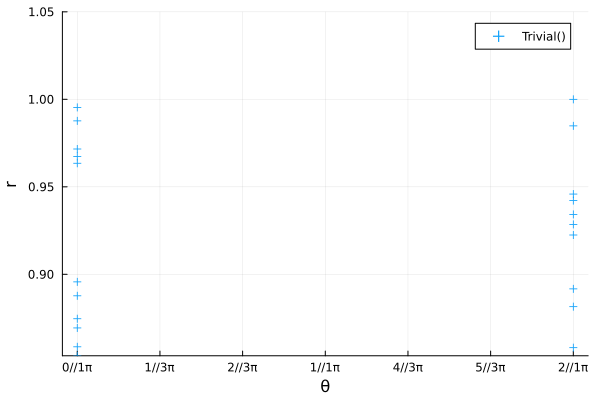

In [20]:
transferplot(ψ₀∞, ψ₀∞)

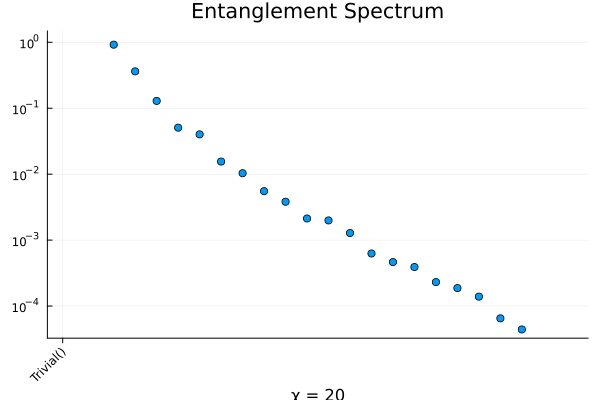

In [21]:
entanglementplot(ψ₀∞)

## Entanglement spectrum and entropy

Entanglement spectrum can be accessed through the $\textbf{entanglement_spectrum(psi, position)}$ function.
It returns Schmidt values $\Lambda_n$ at the entanglement cut. Meanwhile, entanglement spectrum is the spectrum $\lambda_n$ of a reduced density matrix $\rho_A$, and entanglement entropy is $S_A = \text{Tr} (\rho_A\ln\rho_A)$. These two are related in the following equalities.
\begin{align}
\lambda_n &= \Lambda_n^2\\
S_A &= \sum_n \lambda_n\ln (\lambda_n)
\end{align}

In [22]:
# position can be skipped for iDMRG. Equivalently, entanglement_spectrum(ψ₀∞,1)
Λₙ = entanglement_spectrum(ψ₀∞).values[1]
λₙ = Λₙ.^2

20-element Vector{Float64}:
 0.8475698566240949
 0.13116037256179686
 0.016684289180659652
 0.002572839708674104
 0.0016086111119156417
 0.00024102932240943335
 0.00010694906320373796
 3.0483534566982347e-5
 1.4578497988069555e-5
 4.526089934634626e-6
 3.952275547397464e-6
 1.637405703515881e-6
 3.924245753537749e-7
 2.1585613892539164e-7
 1.5258094529002543e-7
 5.321789191378171e-8
 3.5067334460285704e-8
 1.9284884829589167e-8
 4.242468453501577e-9
 1.9492659479423954e-9

In [23]:
# Check if the reduced density is properly normalized.
sum(λₙ)

1.0000000000000002

##### $S_A$ can be straightforwardly computed from $\lambda_n$

In [24]:
println("SA : ",sum(-λₙ.*log.(λₙ)))
println()
println("Alternatively, we can use a built-in function.")
println("SA : ",real(entropy(ψ₀∞)[1]))

SA : 0.5041906161742777

Alternatively, we can use a built-in function.
SA : 0.5041906161742772


## Finite-$\chi$ scaling
In iDMRG, we use $\xi(\chi)$ as a scaling parameter rather than the system size. CFT scaling then becomes
$$S_A(\chi) \approx \frac{c}{6}\ln\xi(\chi)$$

In [25]:
function compute_SA(χ)
    #Change accordingly for larger unitcell
    lattice∞ = InfiniteChain(1)
    # Your Hamiltonian
    H_TF∞ = @mpoham sum(nearest_neighbours(lattice∞)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice∞)) do i
            return X_term{i}
    end
    # physical dimension : Spin 1/2
    d = 2
    random_data = TensorMap(rand, ComplexF64, ℂ^χ * ℂ^d, ℂ^χ);
    state∞ = InfiniteMPS([random_data])
    ψ₀∞, cache, delta = find_groundstate(state∞, H_TF∞, VUMPS())
    SA = real(entropy(ψ₀∞)[1])
    Λₙ = entanglement_spectrum(ψ₀∞).values[1]
    λₙ = Λₙ.^2
    ξ = correlation_length(ψ₀∞)
    return ξ,SA,λₙ
end


function finiteχ_scaling(χ_list,lattice∞,H∞)
    # physical dimension : Spin 1/2
     χ = χ_list[1]
    println(χ)
    random_data = TensorMap(rand, ComplexF64, ℂ^χ * H∞[1].pspace, ℂ^χ);
    ψ₀∞ = InfiniteMPS([random_data])
    ψ₀∞, env, delta = find_groundstate(ψ₀∞, H∞, VUMPS(tol_galerkin = 1e-12,maxiter = 800,verbose=false))
    ξ_list = [correlation_length(ψ₀∞)]
    SA_list = [real(entropy(ψ₀∞)[1])]
    @showprogress for i=1:(length(χ_list)-1)
        println(χ_list[i+1])
        δχ = χ_list[i+1] - χ_list[i]
        # expand the bond dimension of the previous ψ₀∞
        # This allows for VUMPS to converge faster
        ψ₀∞, env = changebonds(ψ₀∞, H∞,OptimalExpand(truncdim(δχ)), env)
        ψ₀∞, env, delta = find_groundstate(ψ₀∞, H∞ ,VUMPS(tol_galerkin = 1e-12,maxiter = 5000,verbose=false),env)
        SA = real(entropy(ψ₀∞)[1])
        ξ = correlation_length(ψ₀∞)
        append!(ξ_list, ξ)
        append!(SA_list,SA)
    end
    return ξ_list,SA_list,ψ₀∞
end

finiteχ_scaling (generic function with 1 method)

In [26]:
lattice∞ = InfiniteChain(1)
# Your Hamiltonian
H_TF∞ = @mpoham sum(nearest_neighbours(lattice∞)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice∞)) do i
            return X_term{i}
        end

χ_list =collect(8:2:24)
println("χlist : ",χ_list)
ξ_list,SA_list,ψ₀∞ = finiteχ_scaling(χ_list,lattice∞,H_TF∞)

χlist : [8, 10, 12, 14, 16, 18, 20, 22, 24]
8
10
12


Progress:  25%|██████████▎                              |  ETA: 0:00:34

14


Progress:  38%|███████████████▍                         |  ETA: 0:00:25

16


Progress:  50%|████████████████████▌                    |  ETA: 0:00:20

18


Progress:  62%|█████████████████████████▋               |  ETA: 0:00:15

20


Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:11

22


Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:06

24


Progress: 100%|█████████████████████████████████████████| Time: 0:01:12


([34.048332573386524, 57.606734606261845, 82.71103871507053, 107.11668797311424, 142.00458767283058, 189.46031509662694, 223.92923105515675, 280.08006430125903, 315.27234492174296], [0.34731483675496266, 0.395116463637941, 0.4226195771782986, 0.4432790767351466, 0.46866760904741234, 0.49128854230744373, 0.5029066523731128, 0.5240065677894394, 0.5365737299571366], │   ⋮
│ CR[1]: TensorMap(ℂ^24 ← ℂ^24)
├── AL[1]: TensorMap((ℂ^24 ⊗ ℂ^2) ← ℂ^24)
│   ⋮
)

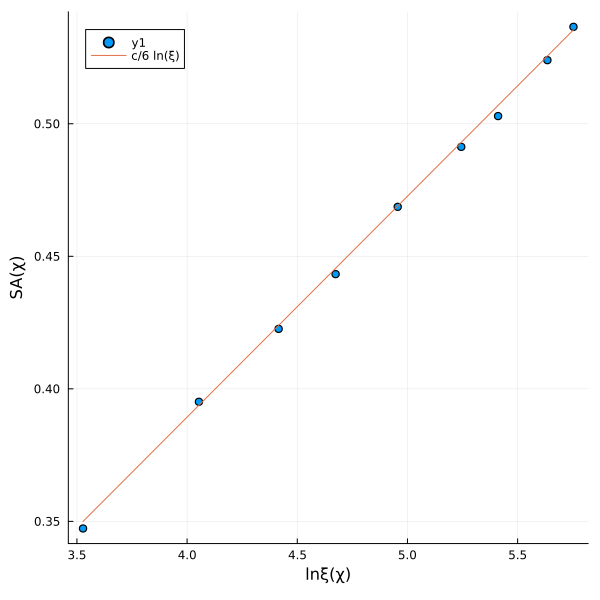

In [27]:
c=1/2
plot(log.(ξ_list),SA_list,st=:scatter,size=(600,600),xlabel="lnξ(χ)",ylabel="SA(χ)")
plot!(log.(ξ_list),c/6*log.(ξ_list).+0.056,label="c/6 ln(ξ)")

In [28]:
entanglement_spectrum(ψ₀∞)

TensorKit.SortedVectorDict{Trivial, Vector{Float64}} with 1 entry:
  Trivial() => [0.914379, 0.372348, 0.139085, 0.0565846, 0.0459752, 0.0185586, …

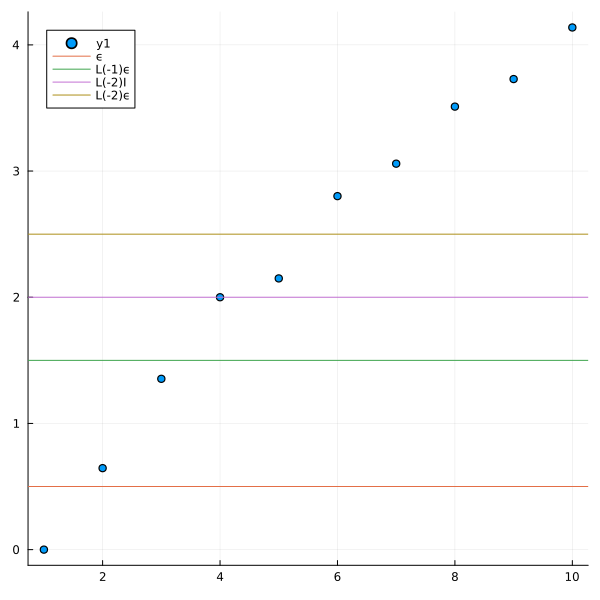

In [29]:
Λₙ = entanglement_spectrum(ψ₀∞).values[1]
λₙ = Λₙ.^2
normalization = log.(λₙ[1]./λₙ[4])
plot(2*log.(λₙ[1]./λₙ[1:10])/normalization,st=:scatter,size=(600,600))
hline!([0.5],label="ϵ")
hline!([1.5],label="L(-1)ϵ")
hline!([2.0],label="L(-2)I")
hline!([2.5],label="L(-2)ϵ")

## Entanglement spectrum
Finally, let us take a closer look at the entanglement spectrum. We shall see the boundary scaling dimension as discussed in [Lauchil's paper](https://arxiv.org/pdf/1303.0741.pdf).
$$\ln \lambda_n \propto \Delta_n$$

In [30]:
L = 150
χ = 30
lattice = FiniteChain(L)
H_TF = @mpoham sum(1:(L-1)) do i
            return ZZ_term{lattice[i],lattice[i+1]}
        end + sum(1:L) do i
            return X_term{lattice[i]}
        end 
state = FiniteMPS(rand,ComplexF64,L,ℂ^2,ℂ^χ)
ψ₀, cache, delta = find_groundstate(state, H_TF, DMRG());

┌ Info: DMRG iteration:
│   iter = 1
│   ϵ = 8.694070174856535e-5
│   λ = -190.62342015418577 - 1.798313225137744e-13im
└   Δt = 33.950491108
┌ Info: DMRG iteration:
│   iter = 2
│   ϵ = 1.6949504672877463e-7
│   λ = -190.62342124665014 + 2.10581120260831e-13im
└   Δt = 29.134910374
┌ Info: DMRG iteration:
│   iter = 3
│   ϵ = 5.8814378763222393e-8
│   λ = -190.623421248176 - 1.9590360798036702e-14im
└   Δt = 19.10809276
┌ Info: DMRG iteration:
│   iter = 4
│   ϵ = 4.94253489969692e-8
│   λ = -190.62342124868863 + 5.631908162731241e-14im
└   Δt = 15.012422784
┌ Info: DMRG iteration:
│   iter = 5
│   ϵ = 2.7908172997874354e-8
│   λ = -190.62342124872555 + 1.446398887539234e-14im
└   Δt = 10.758438729
┌ Info: DMRG iteration:
│   iter = 6
│   ϵ = 1.0881045769153849e-8
│   λ = -190.6234212487282 - 4.661371325107595e-15im
└   Δt = 7.534874444
┌ Info: DMRG iteration:
│   iter = 7
│   ϵ = 5.412566422502957e-9
│   λ = -190.62342124873018 - 4.112902290657634e-14im
└   Δt = 6.040909396
┌ Info: D

In [31]:
ψ₀

150-site FiniteMPS:
┌── AC[150]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^1)
├── AL[149]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^2)
├── AL[148]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^4)
├── AL[147]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^8)
├── AL[146]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^16)
├── AL[145]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[144]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[143]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[142]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[141]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[140]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
│⋮
├── AL[10]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[9]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[8]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[7]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[6]: TensorMap((ℂ^30 ⊗ ℂ^2) ← ℂ^30)
├── AL[5]: TensorMap((ℂ^16 ⊗ ℂ^2) ← ℂ^30)
├── AL[4]: TensorMap((ℂ^8 ⊗ ℂ^2) ← ℂ^16)
├── AL[3]: TensorMap((ℂ^4 ⊗ ℂ^2) ← ℂ^8)
├── AL[2]: TensorMap((ℂ^2 ⊗ ℂ^2) ← ℂ^4)
└── AL[1]: TensorMap((ℂ^1 ⊗ ℂ^2) ← ℂ^2)


In [32]:
# Let us see the entanglement spectrum in the center
λₙ = entanglement_spectrum(ψ₀,50).values[1].^2

30-element Vector{Float64}:
 0.7714094660523453
 0.21273145335524818
 0.011975066435203473
 0.003302361422270604
 0.0004370725442793765
 0.00012053072204412459
 1.1631746651666184e-5
 6.784723057343499e-6
 3.207376332928246e-6
 1.8709954984170247e-6
 2.4010537174992304e-7
 1.8035957536362256e-7
 6.613274744610095e-8
 ⋮
 1.0492444903336439e-9
 1.0004950785343652e-9
 1.1750265545854597e-10
 1.0035720067969781e-10
 4.9739624788863335e-11
 3.925427162562766e-11
 3.033427620906439e-11
 2.7341025089618974e-11
 1.3329834731756715e-11
 9.497346622081944e-12
 2.4842946489813997e-12
 1.3875954668558221e-12

In [33]:
sum(λₙ)

0.9999999999999984

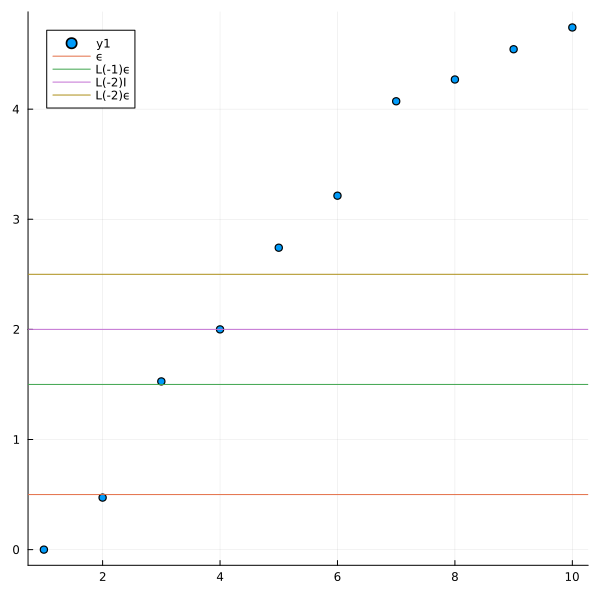

In [34]:
normalization = log.(λₙ[1]./λₙ[4])
plot(2*log.(λₙ[1]./λₙ[1:10])/normalization,st=:scatter,size=(600,600))
hline!([0.5],label="ϵ")
hline!([1.5],label="L(-1)ϵ")
hline!([2.0],label="L(-2)I")
hline!([2.5],label="L(-2)ϵ")

Finite-size effects persists logarithmically.

## You can do the same thing with iDMRG. 
For the purpose of accuracy, let us impose $\mathbb{Z}_2$ symmetry.

In [35]:
# alg = VUMPS(;tol_galerkin = 1e-12,tol_gauge=1e-12,maxiter = 700,verbose=false)
χ = 40
H = transverse_field_ising(Z2Irrep,g=g)
Ψ₀ = InfiniteMPS([Rep[ℤ₂](0 => 1, 1 => 1)], [Rep[ℤ₂](0 => χ//2, 1 => χ//2)])
Ψ, envs, δ = find_groundstate(Ψ₀, H, VUMPS())

┌ Info: VUMPS iteration:
│   iter = 1
│   ϵ = 0.011303224641592216
│   λ = -1.2721045548395589 + 1.1839487723541708e-16im
└   Δt = 0.113463401
┌ Info: VUMPS iteration:
│   iter = 2
│   ϵ = 0.0026647904377563487
│   λ = -1.2730869463076786 + 3.8163916471489756e-17im
└   Δt = 0.104099965
┌ Info: VUMPS iteration:
│   iter = 3
│   ϵ = 0.0009233685825460606
│   λ = -1.2732061256195895 + 1.0278236595162582e-16im
└   Δt = 0.113791628
┌ Info: VUMPS iteration:
│   iter = 4
│   ϵ = 0.0003452751521527395
│   λ = -1.2732327549134546 - 3.5561831257524545e-17im
└   Δt = 0.126439004
┌ Info: VUMPS iteration:
│   iter = 5
│   ϵ = 0.00016001366943924796
│   λ = -1.2732384231617178 - 9.410874857174178e-17im
└   Δt = 0.15067154
┌ Info: VUMPS iteration:
│   iter = 6
│   ϵ = 8.150063343684684e-5
│   λ = -1.2732391892646544 - 1.3877787807814457e-16im
└   Δt = 0.167245614
┌ Info: VUMPS iteration:
│   iter = 7
│   ϵ = 5.038425658599216e-5
│   λ = -1.2732393187179474 - 1.3010426069826053e-17im
└   Δt = 0.178276

┌ Info: VUMPS iteration:
│   iter = 33
│   ϵ = 1.7633752566746265e-6
│   λ = -1.273239527846352 + 5.2909066017292616e-17im
└   Δt = 0.42909593
┌ Info: VUMPS iteration:
│   iter = 34
│   ϵ = 1.5776997463876015e-6
│   λ = -1.2732395278562647 - 5.160802341031001e-17im
└   Δt = 0.431490571
┌ Info: VUMPS iteration:
│   iter = 35
│   ϵ = 1.4136130963585763e-6
│   λ = -1.2732395278636577 + 1.6479873021779667e-17im
└   Δt = 0.417887882
┌ Info: VUMPS iteration:
│   iter = 36
│   ϵ = 1.274387630892729e-6
│   λ = -1.2732395278691562 - 1.1275702593849246e-17im
└   Δt = 0.421853865
┌ Info: VUMPS iteration:
│   iter = 37
│   ϵ = 1.1489663510654942e-6
│   λ = -1.2732395278733244 + 1.3314002678121994e-16im
└   Δt = 0.419538083
┌ Info: VUMPS iteration:
│   iter = 38
│   ϵ = 1.0400675953117662e-6
│   λ = -1.2732395278764883 + 3.946495907847236e-17im
└   Δt = 0.422977276
┌ Info: VUMPS iteration:
│   iter = 39
│   ϵ = 9.411464090900623e-7
│   λ = -1.2732395278789261 + 7.762887554996212e-17im
└   Δt = 0.41

┌ Info: VUMPS iteration:
│   iter = 65
│   ϵ = 8.516432340276582e-8
│   λ = -1.27323952788833 - 6.635317295611287e-17im
└   Δt = 0.435821862
┌ Info: VUMPS iteration:
│   iter = 66
│   ϵ = 7.793022694745193e-8
│   λ = -1.2732395278883422 - 3.903127820947816e-18im
└   Δt = 0.437344692
┌ Info: VUMPS iteration:
│   iter = 67
│   ϵ = 7.132693724092575e-8
│   λ = -1.273239527888351 + 2.905661822261152e-17im
└   Δt = 0.448991859
┌ Info: VUMPS iteration:
│   iter = 68
│   ϵ = 6.529858948821184e-8
│   λ = -1.2732395278883595 - 6.938893903907228e-18im
└   Δt = 0.433613626
┌ Info: VUMPS iteration:
│   iter = 69
│   ϵ = 5.979416507271136e-8
│   λ = -1.273239527888366 - 4.9439619065339e-17im
└   Δt = 0.435466733
┌ Info: VUMPS iteration:
│   iter = 70
│   ϵ = 5.4767356126420995e-8
│   λ = -1.273239527888372 - 5.2475385148298415e-17im
└   Δt = 0.452445569
┌ Info: VUMPS iteration:
│   iter = 71
│   ϵ = 5.017596347516801e-8
│   λ = -1.2732395278883772 - 9.974659986866641e-17im
└   Δt = 0.456630554
┌ In

┌ Info: VUMPS iteration:
│   iter = 97
│   ϵ = 5.7871593148738815e-9
│   λ = -1.2732395278884008 + 7.936359902593892e-17im
└   Δt = 0.440430878
┌ Info: VUMPS iteration:
│   iter = 98
│   ϵ = 5.354340152524218e-9
│   λ = -1.2732395278883994 + 3.0357660829594124e-18im
└   Δt = 0.444288439
┌ Info: VUMPS iteration:
│   iter = 99
│   ϵ = 4.956007687141064e-9
│   λ = -1.273239527888402 + 4.2500725161431774e-17im
└   Δt = 0.474728757
┌ Info: VUMPS iteration:
│   iter = 100
│   ϵ = 4.589263709744485e-9
│   λ = -1.273239527888401 - 2.2551405187698492e-17im
└   Δt = 0.479260005
┌ Warning: VUMPS maximum iterations
│   iter = 100
│   ϵ = 4.589263709744485e-9
│   λ = -1.273239527888401 - 2.2551405187698492e-17im
└ @ MPSKit ~/.julia/packages/MPSKit/atykv/src/algorithms/groundstate/vumps.jl:94
┌ Info: VUMPS summary:
│   ϵ = 4.589263709744485e-9
│   λ = -1.273239527888401 - 2.2551405187698492e-17im
└   Δt = 40.212146752


(│   ⋮
│ CR[1]: TensorMap(Rep[ℤ₂](0=>20, 1=>20) ← Rep[ℤ₂](0=>20, 1=>20))
├── AL[1]: TensorMap((Rep[ℤ₂](0=>20, 1=>20) ⊗ Rep[ℤ₂](0=>1, 1=>1)) ← Rep[ℤ₂](0=>20, 1=>20))
│   ⋮
, MPSKit.MPOHamInfEnv{MPOHamiltonian{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 2, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}}, ComplexF64}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 1, 0, 0, Nothing}}, InfiniteMPS{TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 2, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{ComplexF64}}, FusionTree{Z2Irrep, 2, 0, 1, Nothing}, FusionTree{Z2Irrep, 1, 0, 0, Nothing}}, TensorMap{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 1, 1, Z2Irrep, TensorKit.SortedVectorDict{Z2Irrep, Matrix{C

In [36]:
λ∞_odd = entanglement_spectrum(Ψ)[Z2Irrep(1)].^2
λ∞_even = entanglement_spectrum(Ψ)[Z2Irrep(0)].^2

20-element Vector{Float64}:
 0.2750562215072531
 0.045001220565680566
 0.006092526216284337
 0.0006571215513353102
 0.0001760205230366431
 5.275609560836427e-5
 1.7883553505924103e-5
 2.6868199691638778e-6
 2.3945951373946737e-6
 1.2532624860955369e-6
 3.680528219852541e-7
 1.3703896931797943e-7
 5.628330865026064e-8
 5.076139061131373e-8
 1.8451944053286602e-8
 1.545205579628486e-8
 3.2845962542628063e-9
 2.0207699088486875e-9
 8.504675802136285e-10
 3.5953430521568677e-10

In [37]:
sum(λ∞_even) + sum(λ∞_odd)

0.9999999999999998

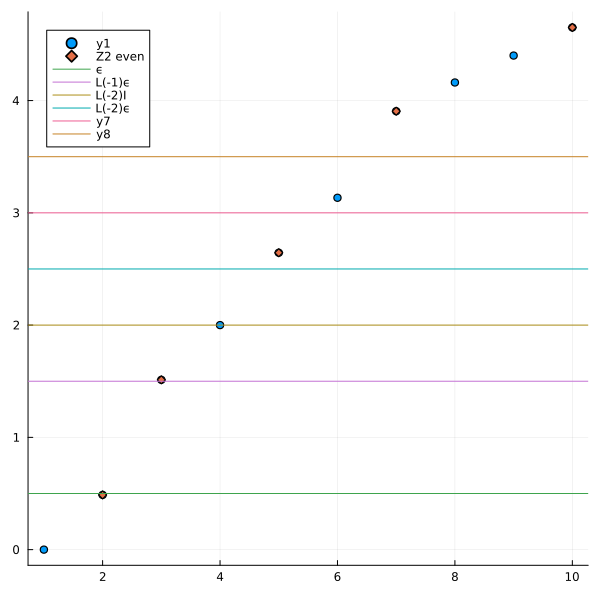

In [38]:
λ∞ = sort([λ∞_even..., λ∞_odd...],rev=true)
λmax = λ∞[1]
normalization = log(λ∞[1]/λ∞[4])
plot(2*log.(λmax./λ∞[1:10])/normalization,st=:scatter,size=(600,600))
plot!([2,3,5,7,10],2*log.(λmax./λ∞_even[1:5])/normalization,st=:scatter,marker=:diamond,size=(600,600),label="Z2 even")
hline!([0.5],label="ϵ")
hline!([1.5],label="L(-1)ϵ")
hline!([2.0],label="L(-2)I")
hline!([2.5],label="L(-2)ϵ")
hline!([3])
hline!([3.5])

## Extension to a custom operators
Let us define operators of the three-state Potts model

In [39]:
ω = exp(2*im*pi/3)

-0.5 + 0.8660254037844386im

In [40]:
Ω = TensorMap([1 0 0;0 ω 0;0 0 ω^2],ℂ^3←ℂ^3)
Γ = TensorMap(Complex[0. 1. 0.; 0. 0. 1.;1. 0. 0.],ℂ^3←ℂ^3)
I = TensorMap(Complex[1. 0. 0.; 0. 1. 0.; 0. 0. 1.],ℂ^3←ℂ^3)

TensorMap(ℂ^3 ← ℂ^3):
 1.0 + 0.0im  0.0 + 0.0im  0.0 + 0.0im
 0.0 + 0.0im  1.0 + 0.0im  0.0 + 0.0im
 0.0 + 0.0im  0.0 + 0.0im  1.0 + 0.0im


In [41]:
ΩΩdag = Ω⊗adjoint(Ω)
first_term = ΩΩdag+adjoint(ΩΩdag)
# second_term = Γ⊗I + I ⊗adjoint(Γ)
ΓI =  Γ⊗I
IΓ = I⊗Γ
second_term = ΓI+IΓ

┌ Warning: The function `scalartype` is not implemented for (values of) type `Any`;
│ this fallback will disappear in future versions of VectorInterface.jl
└ @ VectorInterface ~/.julia/packages/VectorInterface/pc5AD/src/fallbacks.jl:20


LoadError: StackOverflowError:

In [42]:
lattice∞ = InfiniteChain(1)
χ = 20
H_Potts∞ = @mpoham sum(nearest_neighbours(lattice∞)) do (i, j)
            return ZZ_term{i,j}
        end + sum(vertices(lattice∞)) do i
            return X_term{i}
    end;